In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the dataset and performing an exploratory data analysis to understand its structure and content.

In [2]:
df = pd.read_csv("blogs.csv")

In [3]:
df.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [4]:
df.shape

(2000, 2)

In [5]:
df['Labels'].nunique()

20

We see that here we have 20 different labels.

In [23]:
df.groupby('Labels').describe()

Data         \
                         count unique   
Labels                                  
alt.atheism                100    100   
comp.graphics              100    100   
comp.os.ms-windows.misc    100    100   
comp.sys.ibm.pc.hardware   100    100   
comp.sys.mac.hardware      100    100   
comp.windows.x             100    100   
misc.forsale               100    100   
rec.autos                  100    100   
rec.motorcycles            100    100   
rec.sport.baseball         100    100   
rec.sport.hockey           100    100   
sci.crypt                  100    100   
sci.electronics            100    100   
sci.med                    100    100   
sci.space                  100    100   
soc.religion.christian     100    100   
talk.politics.guns         100    100   
talk.politics.mideast      100    100   
talk.politics.misc         100    100   
talk.religion.misc         100    100   

                                                                             \
                                                                        top   
Labels                                                                        
alt.atheism               Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
comp.graphics             Newsgroups: comp.graphics\nPath: cantaloupe.sr...   
comp.os.ms-windows.misc   Path: cantaloupe.srv.cs.cmu.edu!rochester!udel...   
comp.sys.ibm.pc.hardware  Newsgroups: comp.sys.ibm.pc.hardware\nPath: ca...   
comp.sys.mac.hardware     Path: cantaloupe.srv.cs.cmu.edu!crabapple.srv....   
comp.windows.x            Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
misc.forsale              Newsgroups: misc.forsale,misc.forsale.computer...   
rec.autos                 Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
rec.motorcycles           Newsgroups: rec.motorcycles\nPath: cantaloupe....   
rec.sport.baseball        Newsgroups: rec.sport.baseball\nPath: cantalou...   
rec.sport.hockey          Newsgroups: rec.sport.hockey\nPath: cantaloupe...   
sci.crypt                 Xref: cantaloupe.srv.cs.cmu.edu comp.org.eff.t...   
sci.electronics           Newsgroups: sci.electronics\nPath: cantaloupe....   
sci.med                   Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
sci.space                 Newsgroups: sci.space\nPath: cantaloupe.srv.cs...   
soc.religion.christian    Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...   
talk.politics.guns        Xref: cantaloupe.srv.cs.cmu.edu talk.politics....   
talk.politics.mideast     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...   
talk.politics.misc        Xref: cantaloupe.srv.cs.cmu.edu alt.drugs:4483...   
talk.religion.misc        Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...   

                              cleaned_data         \
                         freq        count unique   
Labels                                              
alt.atheism                 1          100    100   
comp.graphics               1          100    100   
comp.os.ms-windows.misc     1          100    100   
comp.sys.ibm.pc.hardware    1          100    100   
comp.sys.mac.hardware       1          100    100   
comp.windows.x              1          100    100   
misc.forsale                1          100    100   
rec.autos                   1          100    100   
rec.motorcycles             1          100    100   
rec.sport.baseball          1          100    100   
rec.sport.hockey            1          100    100   
sci.crypt                   1          100    100   
sci.electronics             1          100    100   
sci.med                     1          100    100   
sci.space                   1          100    100   
soc.religion.christian      1          100    100   
talk.politics.guns          1          100    100   
talk.politics.mideast       1          100    100   
talk.politics.misc          1          100    100   
talk.religion.misc          1          100    100   

                                            

In [6]:
df['Labels'].value_counts()

,count
Labels,
alt.atheism,100
comp.graphics,100
talk.politics.misc,100
talk.politics.mideast,100
talk.politics.guns,100
soc.religion.christian,100
sci.space,100
sci.med,100
sci.electronics,100


In [7]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

In [8]:
df['cleaned_data'] = df['Data'].str.replace(r'\W', ' ').str.lower()

In [9]:
x_train, x_test, y_train, y_test = train_test_split(df['cleaned_data'], df['Labels'], test_size=0.2, random_state=42)

In [10]:
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
x_train_tfidf = tfidf_vectorizer.fit_transform(x_train)
x_test_tfidf = tfidf_vectorizer.transform(x_test)

We create TfidfVectorizer object, where stop_word='english' tells it to remove common English words which don't usually carry much meaning and we will limit the vocabulary to the 5000 most frequent words.

Basically we are converting text document into numerical format.

In [11]:
x_train_tfidf.shape, x_test_tfidf.shape

((1600, 5000), (400, 5000))

**We try to build and evalute model.**

In [12]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

In [13]:
model = MultinomialNB()
model.fit(x_train_tfidf, y_train)

MultinomialNB()

In [14]:
y_pred = model.predict(x_test_tfidf)

In [15]:
accuracy_score(y_test, y_pred)

0.805

In [16]:
print(classification_report(y_test, y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.60      0.83      0.70        18
           comp.graphics       0.75      0.83      0.79        18
 comp.os.ms-windows.misc       0.81      1.00      0.90        22
comp.sys.ibm.pc.hardware       0.69      0.88      0.77        25
   comp.sys.mac.hardware       0.81      0.62      0.70        21
          comp.windows.x       0.92      0.48      0.63        25
            misc.forsale       0.83      0.83      0.83        18
               rec.autos       0.73      0.89      0.80        18
         rec.motorcycles       0.93      0.81      0.87        16
      rec.sport.baseball       0.83      0.83      0.83        18
        rec.sport.hockey       0.62      1.00      0.77        15
               sci.crypt       0.83      1.00      0.90        19
         sci.electronics       0.82      0.56      0.67        16
                 sci.med       0.88      0.88      0.88        17
         

#Performance of the model.

-> The model has overall accuracy of 81%.

-> We can infer that it correctly classified 81% of the instances in the test set.

-> Looking at the precision, recall and f1-score for each class, We can
 observe the model's performance in identifying each class separately.

 ->  We may also observe that certain classes may have higher or lower scores, suggesting that the model may be better or worse at identifying certain blog categories.

**Performing Sentimental analysis.**

In [17]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import nltk

In [18]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [19]:
sid = SentimentIntensityAnalyzer()

In [20]:
def get_sentiment(text):
    sentiment_scores = sid.polarity_scores(text)
    compound_score = sentiment_scores['compound']
    if compound_score >= 0.05:
        return 'positive'
    elif compound_score <= -0.05:
        return 'negative'
    else:
        return 'neutral'

In [21]:
df['sentiment'] = df['Data'].apply(get_sentiment)

In [22]:
df[['Data', 'sentiment']].head()

,Data,sentiment
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,negative
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,positive
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,negative
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,positive


In [24]:
sentiment_counts = df['sentiment'].value_counts()
print(sentiment_counts)

sentiment
positive    1334
negative     631
neutral       35
Name: count, dtype: int64


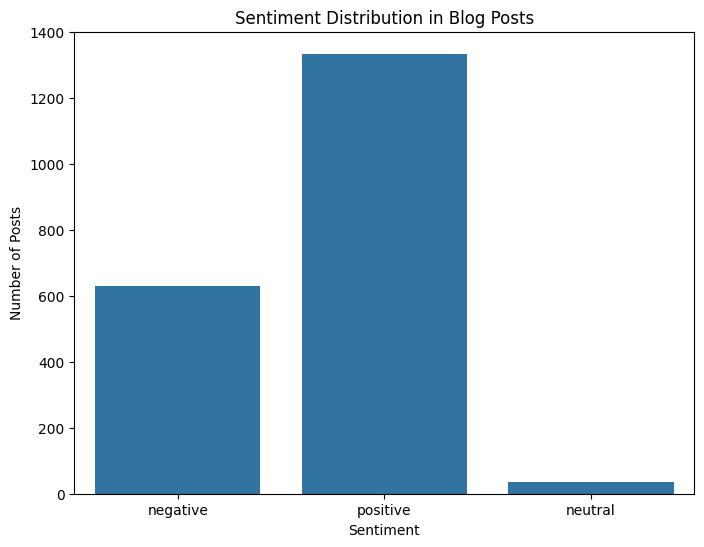

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(x='sentiment', data=df)
plt.title('Sentiment Distribution in Blog Posts')
plt.xlabel('Sentiment')
plt.ylabel('Number of Posts')
plt.show()

From the above sentimental analysis we infer that:

-> The overall tone of the blog is optimistic or uplifting.

-> The prevailing positive sentiment can contribute to a positive brand image and overall tone for the blog.

-> By exploring these avenues, you can gain a more comprehensive understanding of the implications of the content sentiment on the blog's overall message and its impact on the audience.

#Report:

-> The classification model, built using a Multinomial Naive Bayes algorithm and TF-IDF vectorization, achieved an overall accuracy of 81% on the test set. This indicates that the model successfully predicted the correct blog category for 81% of the instances in the unseen data.  

-> Further analysis of the classification report revealed precision, recall, and F1-score metrics for each individual blog category. This granular view helps identify areas where the model excels or struggles in predicting specific categories. For example, if a certain category has a lower F1-score, it suggests the model may be having difficulty in accurately classifying that particular type of blog.

-> A sentiment analysis was performed on the blog data using the VADER lexicon. This analysis revealed the overall sentiment distribution within the blog posts. The majority of posts exhibited a positive sentiment, suggesting a generally upbeat and optimistic tone across the blog's content.

-> The prevalence of positive sentiment can have positive implications for the blog's brand image and overall message. It can foster a welcoming and engaging environment for readers. By analyzing the sentiment associated with different blog topics or categories, you could potentially identify which topics tend to elicit more positive responses from the audience, and thus, optimize content strategy.


-> The analysis revealed that the blog classification model demonstrates a reasonable level of accuracy in identifying blog categories. The sentiment analysis provides valuable insights into the overall tone and user engagement levels associated with the blog's content.  The analysis offers the potential for further exploration and optimization in terms of both content creation and model improvement.
